# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [ ]:
#1
data = pd.read_csv("https://raw.githubusercontent.com/WilbertBryan/dataset/refs/heads/main/penguins_size.csv")
data.sample(10)

# Mengambil data dari csv dan menampilkan 10 data random

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
137,Adelie,Dream,40.2,20.1,200.0,3975.0,MALE
143,Adelie,Dream,40.7,17.0,190.0,3725.0,MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
258,Gentoo,Biscoe,44.0,13.6,208.0,4350.0,FEMALE
182,Chinstrap,Dream,40.9,16.6,187.0,3200.0,FEMALE
178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,FEMALE
136,Adelie,Dream,35.6,17.5,191.0,3175.0,FEMALE
232,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [ ]:
#2
data.info()
# Terdapat 7 column dan terdapat mising value pada column culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, dan sex. terdapat 4 tipe data float dan 3 tipe data object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [ ]:
#3
data.describe()

# Terdapat 342 data di masing-masing column. Rata-rata dari culmen_length 43.9, culmen depth 17.1, flipper_length 200.9
# body_mass 4201,7. Data terkecil dari culmen_length 32.1, culmen_depth 13.1, flipper_length 172, body mass 27000.
# Data terbesar dari culmen_length 59.6, culmen_depth 21.5, flipper_length 231, body_mass 63000

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [ ]:
#4
print(data['species'].value_counts(dropna=False))
print(data['island'].value_counts(dropna=False))
print(data['sex'].value_counts(dropna=False))

# menggunakan .value_counts dan dropna=False untuk melihat setiap unique value dari masing-masing column.
# Untuk missing falues terdapat pada column sex NaN sebanyak 10 dan sebanyak 1.

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [ ]:
#5
data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True)
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(data['sex'].mode()[0], inplace=True)
data['sex'].replace('.', data['sex'].mode()[0], inplace=True)
data.isnull().sum()
# Untuk culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g di isi dengan mean.
# untuk sex di isi dengan mode. dan '.' di replace menjadi mode

<ipython-input-185-7d9e15ad83ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True)
<ipython-input-185-7d9e15ad83ce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

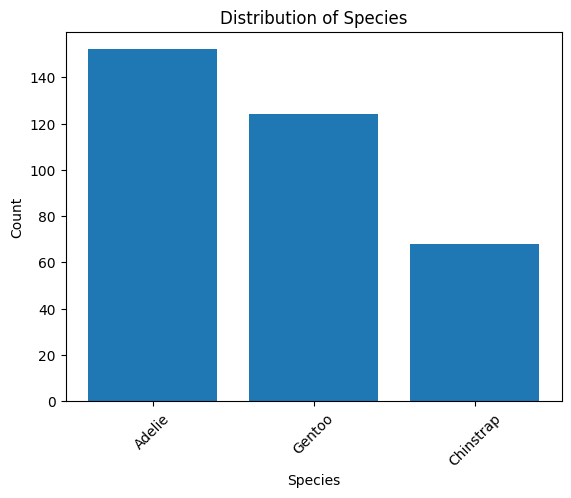

In [ ]:
import matplotlib.pyplot as plt

species_count = data['species'].value_counts()

plt.bar(species_count.index, species_count.values)

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Species')

plt.xticks(ticks=range(len(species_count.index)), labels=species_count.index, rotation=45)

plt.show()

# Pada visualisasi bar graph di bawah menunjukan adeilie memiliki jumlah species terbanyak dan chinstrap yang paling sedikit
# Imbalance Data yang selisih jauh dapat membuat prediksi menjadi salah.
# Maka data yang kurang dapat di isi dengan oversampling agar jumlah distribusi menjadi sama rata

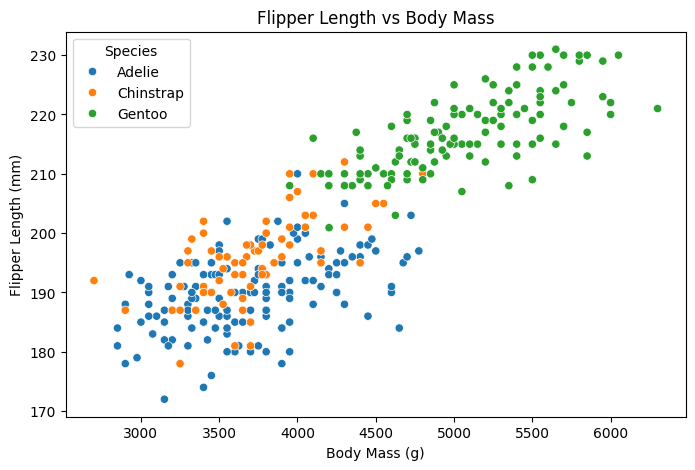

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='body_mass_g', y='flipper_length_mm', hue='species')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.show()

# flipper length dan boddy mass memiliki positif corelation dengan species. semakin lebar flipper length maka semakin berat juga body mass.
# untuk species adelie dan chinstrap miliki rata rata flipper length dan boddy mass yang sama namun untuk species gentoo memiliki
# flipper length dan body mass yang lebih besar dibandingkan dengan adelie dan chinstrap

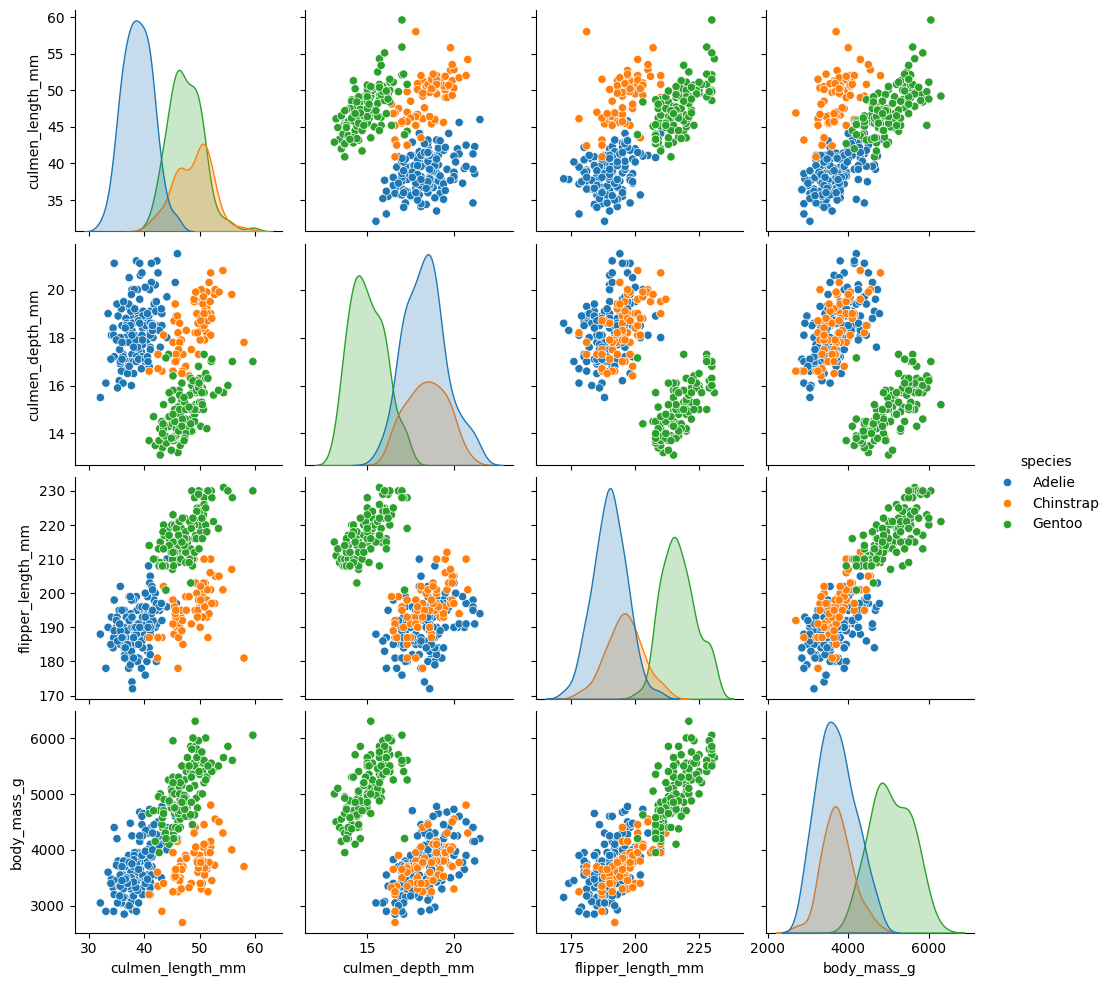

In [ ]:
sns.pairplot(data, hue='species')
plt.show()
# Pair plot dibawah menunjukkan bahwa ada hubungan yang jelas antara variabel-variabel yang membantu membedakan antara tiga spesies
# Spesies Gentoo memiliki panjang culmen terpanjang, panjang flipper terpanjang, dan massa tubuh tertinggi
# sementara spesies Adelie memiliki kedalaman culmen yang lebih besar tetapi panjang culmen yang lebih pendek.

7. Check unique value of our target variable

In [ ]:
#7
print(data['species'].unique())

# Unique value dari species adalah 'Adelie' 'Chinstrap' 'Gentoo'

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [ ]:
#8
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'])

data.head()

# mengubah island dan sex menjadi numeric dan menampilkan 5 data teratas

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,0


9. encode the target column and display the results

In [ ]:
#9
data['species'] = label_encoder.fit_transform(data['species'])
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


10. create a heatmap to see the correlation and explain the conclusion

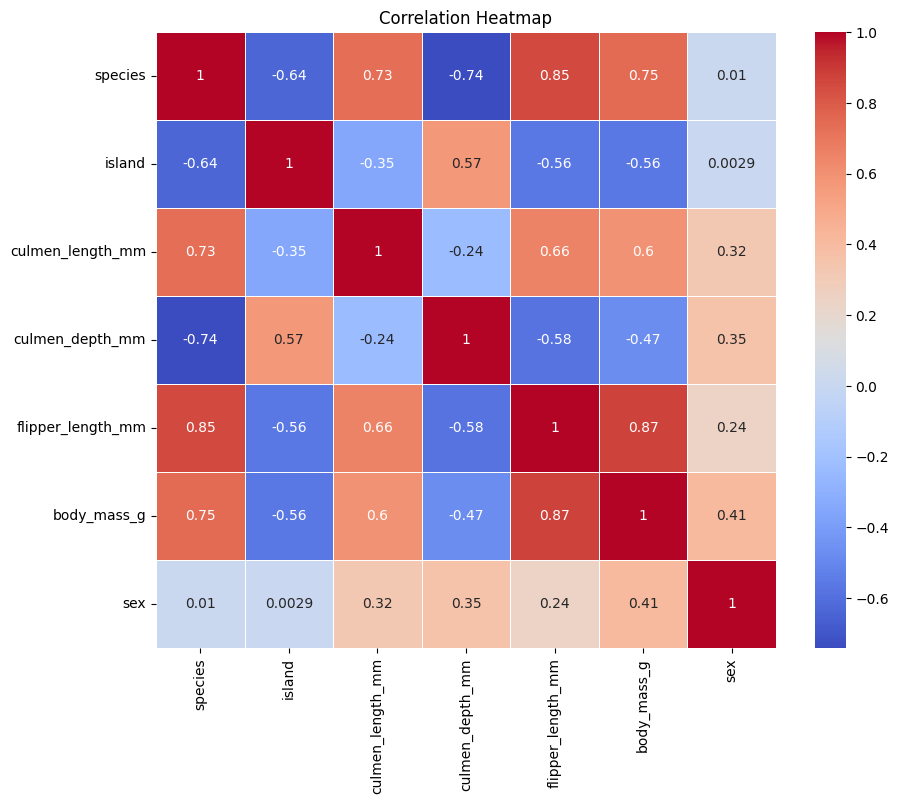

In [ ]:
#10
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Nilai positif tinggi seperti 0.85 antara species dan flipper_length_mm menunjukkan hubungan positif yang kuat ketika satu fitur meningkat, fitur lainnya juga cenderung meningkat.
# Nilai negatif tinggi seperti -0.74 antara species dan culmen_depth_mm menunjukkan hubungan negatif yang kuat ketika satu fitur meningkat, yang lain cenderung menurun.

## Machine Learning

1. Splitting X and y

In [ ]:
#1
X = data.drop('species', axis=1)
y = data['species']

# y adalah target variabel/ variabel yang di prediksi dan X adalah variabel yang memprediksi target

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [ ]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# memisiah data dengan 20% untuk testing dan 80% untuk training

In [ ]:
#3
print(X_train.shape)
print(X_test.shape)

# Untuk X_train terdapat 275 row/data dan terdapat 6 column untuk training data.
# Untuk X_test terdapat 69 row/data dan terdapat  6 column untuk testing data.

(275, 6)
(69, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [ ]:
#Criterion Entropy
#a
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
model_entropy.fit(X_train, y_train)

# menggunakan model decision tree entropy dengan max_depth 3 dan random state 0

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
#b
y_pred_entropy = model_entropy.predict(X_test)

# membuat y_pred_entropy untuk memprediksi X_test

In [ ]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)

# Akurasi entropy sebesar 0.92 atau 92%

Model accuracy score with criterion entropy: 0.927536231884058


In [ ]:
#d
y_train_pred_entropy = model_entropy.predict(X_train)
accuracy_train_entropy = accuracy_score(y_train, y_train_pred_entropy)
accuracy_test_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train Accuracy:", accuracy_train_entropy)
print("Test Accuracy:", accuracy_test_entropy)
# Model dapat memprediksi dengan akurat karena hanya memiliki selisih yang sedikit

Train Accuracy: 0.9709090909090909
Test Accuracy: 0.927536231884058


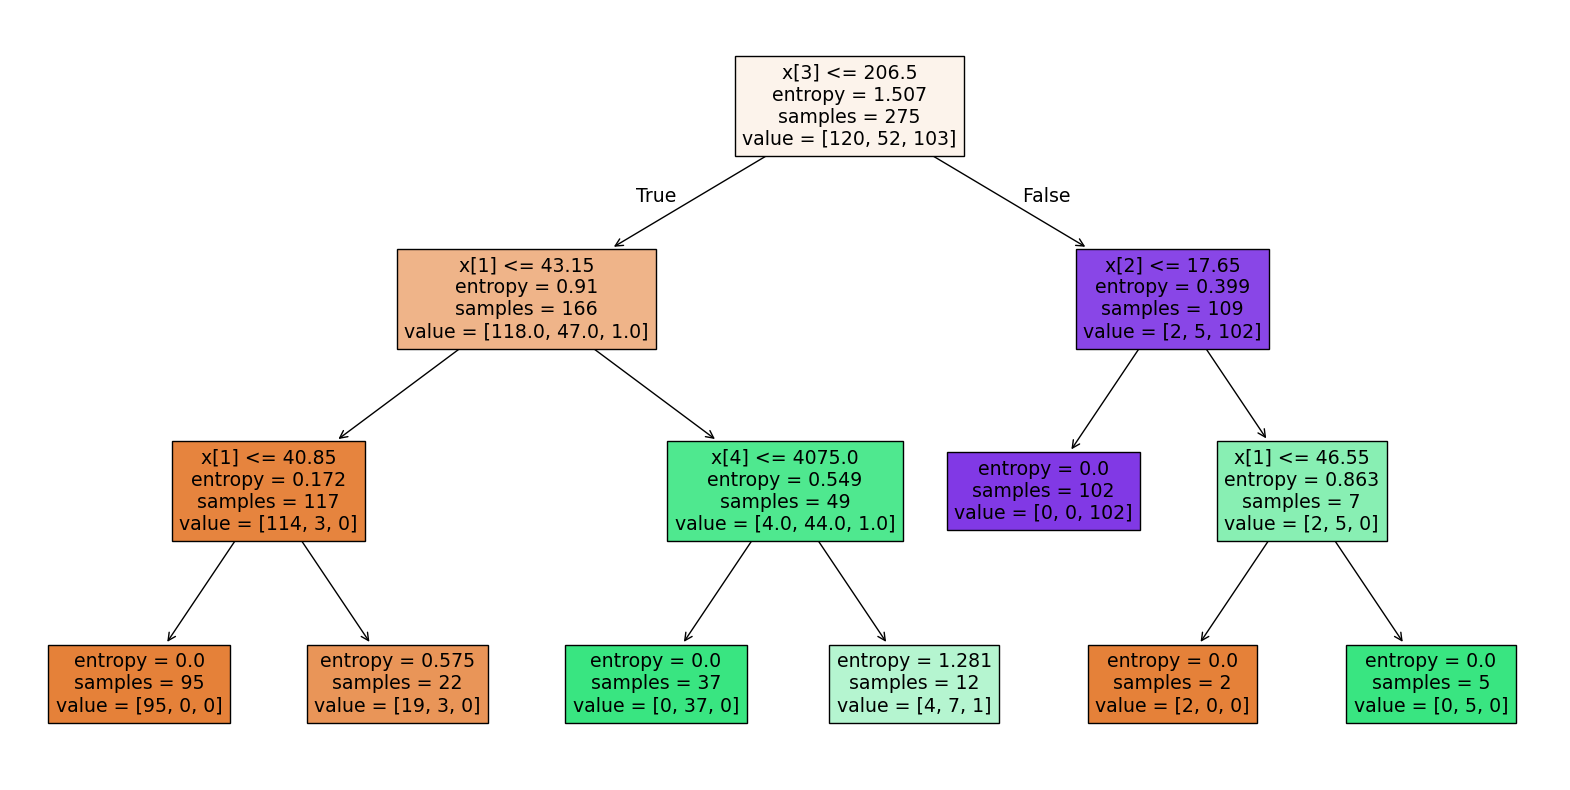

In [ ]:
#e
plt.figure(figsize=(20,10))
tree.plot_tree(model_entropy, filled=True)
plt.show()

2. Criterion Gini index

In [ ]:
#a
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
model_gini.fit(X_train, y_train)

# menggunakan model decision tree gini dengan max_depth 3 dan random state 0

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#b
y_pred_gini = model_gini.predict(X_test)

# membuat y_pred_gini untuk memprediksi X_test

In [ ]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini:", accuracy_gini)

# Akurasi gini sebesar 0.92 atau 92%

Model accuracy score with criterion gini: 0.927536231884058


In [ ]:
#d
y_train_pred_gini = model_gini.predict(X_train)
accuracy_train_gini = accuracy_score(y_train, y_train_pred_gini)
accuracy_test_gini = accuracy_score(y_test, y_pred_gini)
print("Train Accuracy:", accuracy_train_gini)
print("Test Accuracy:", accuracy_test_gini)
# Model dapat memprediksi dengan akurat karena hanya memiliki selisih yang sedikit

Train Accuracy: 0.9709090909090909
Test Accuracy: 0.927536231884058


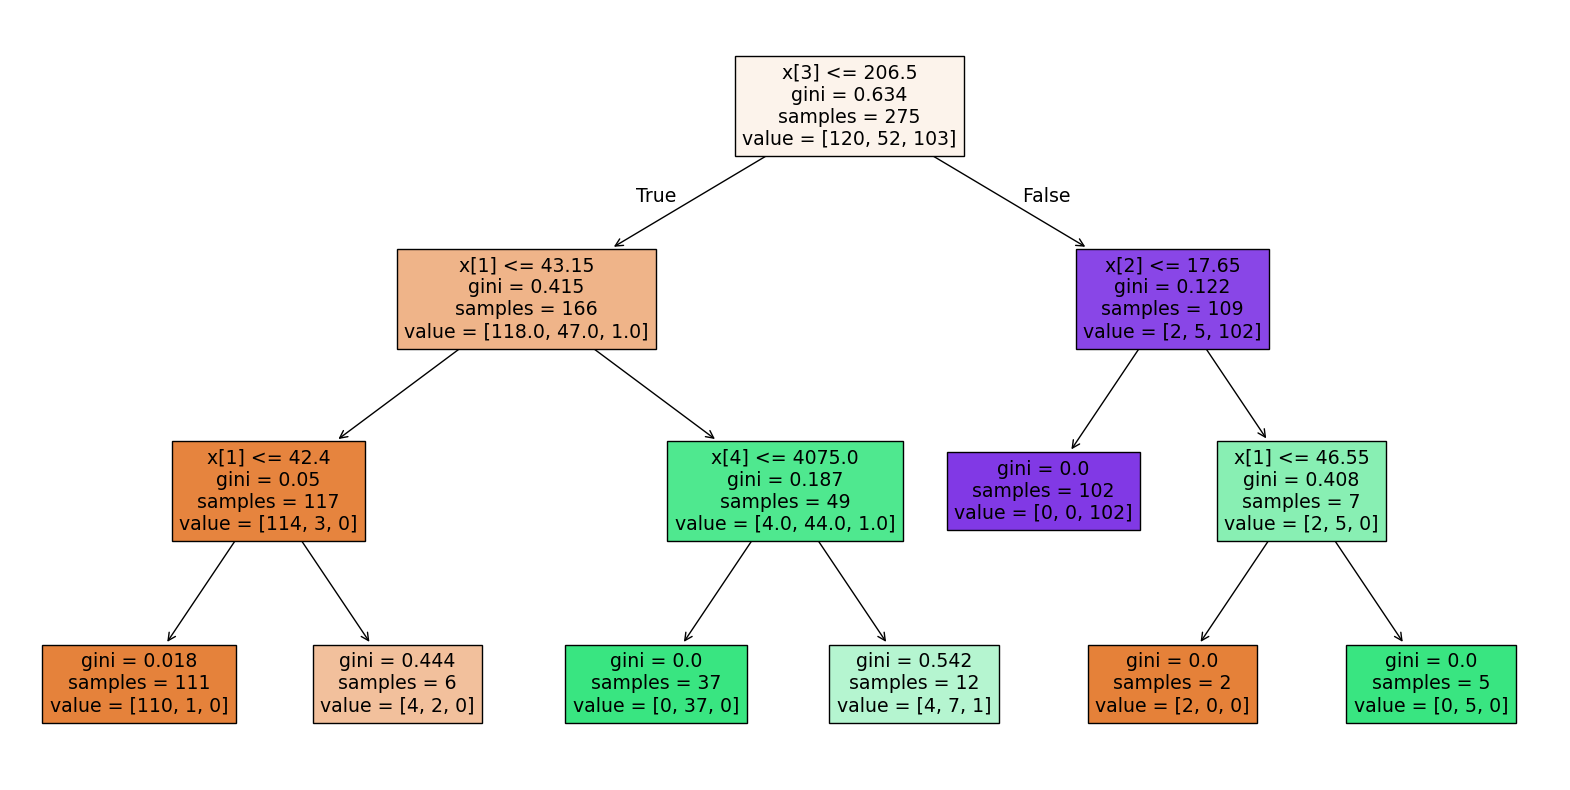

In [ ]:
#e
plt.figure(figsize=(20,10))
tree.plot_tree(model_gini, filled=True)
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [ ]:
#f
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)

# Menampilkan confusion matrix dari entropy dan gini index

Confusion Matrix Entropy:
[[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]

Confusion Matrix Gini:
[[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [ ]:
#g
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_entropy))
print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

# Menampilkan classification report dari entropy dan gini index.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69


Classification Report Gini
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [ ]:
#h

# Hasil dari Entropy dan Gini menghasilkan Train akurasi yang sama yaitu 97.09% dan Test akurasi yang sama yaitu 92.75%.
# Confussion matrix dan Classification Report dari Entropy dan Gini juga menampilkan jumlah yang sama. Overal dari akurasinya adalah 93%
# Entropy dan Gini menghasilkan model dengan akurasi tinggi, menunjukkan klasifikasi yang efektif pada dataset.
# Confussion matrix menunjukkan beberapa kesalahan klasifikasi, terutama untuk class 1, yang menunjukkan adanya dapat di perbaiki.
# Classification report menunjukan kinerja yang kuat di seluruh class, terutama untuk class 2 sedangkan
# class 1 mungkin mendapat manfaat dari strategi untuk meningkatkan presisi.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [ ]:
#a
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# menggunakan model naive bayes

GaussianNB()

In [ ]:
#b
y_pred_nb = model_nb.predict(X_test)

# membuat y_pred_nb untuk memprediksi X_test

In [ ]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with Naive Bayes:", accuracy_nb)

# Akurasi naive bayes sebesar 0.97 atau 97%

#d
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix Naive Bayes:")
print(cm_nb)

# Menampilkan confusion matrix dari naive bayes

Model accuracy score with Naive Bayes: 0.9710144927536232
Confusion Matrix Naive Bayes:
[[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [ ]:
#e
print("Classification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))

# Menampilkan classification report dari naive bayes.

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [ ]:
#f

# Akurasi dari naive bayes sebesar 97%. rata - rata dari precision, recall, dan F1-score adalah 0.97
# Naive Bayes memiliki akurasi tinggi sebesar 97.10%, menunjukkan klasifikasi yang efektif di seluruh dataset.
# Classification Report memiliki presisi dan recall yang sangat baik untuk Class 2 yang diprediksi dengan sempurna.
# Class 1 juga berkinerja baik.

## KNN



---



In [ ]:
#a
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=19)
model_knn.fit(X_train, y_train)

# menggunakan model KNN dan menggunakan N sebesar 19

KNeighborsClassifier(n_neighbors=19)

In [ ]:
#b
y_pred_knn = model_knn.predict(X_test)

# membuat y_pred_reg untuk memprediksi X_test

In [ ]:
#c
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Model accuracy score with KNN:", accuracy_knn)

# Akurasi KNN sebesar 0.71 atau 71%

Model accuracy score with KNN: 0.7101449275362319


In [ ]:
#d
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(cm_knn)

# Menampilkan confusion matrix dari KNN

Confusion Matrix KNN:
[[28  0  4]
 [14  2  0]
 [ 2  0 19]]


In [ ]:
#e
print("Classification Report KNN")
print(classification_report(y_test, y_pred_knn))

# Menampilkan classification report dari KNN.

Classification Report KNN
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        32
           1       1.00      0.12      0.22        16
           2       0.83      0.90      0.86        21

    accuracy                           0.71        69
   macro avg       0.82      0.63      0.61        69
weighted avg       0.78      0.71      0.66        69



In [ ]:
#f

# Model KNN memiliki akurasi sebesar 0.71, atau 71%. Ini menunjukkan bahwa model dapat mengklasifikasikan dengan benar sekitar 71% dari data pengujian.
# Model KNN menunjukkan performa yang cukup baik secara keseluruhan, tetapi ada masalah besar dalam klasifikasi class 1, yang perlu diperbaiki.
# Penggunaan model dari knn menghasilkan nilai yang rendah dibandingkan model lainnya karena distribusi data pada target variabel kurang merata.

Good Luck :)